In [29]:
import pandas as pd
import numpy as np
import os,sys
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

In [30]:

csv_dir = '/Volumes/UCDN/datasets/IDM'
agg_fn = os.path.join(csv_dir,'Aggregate_All_Model_Parameters.csv')
agg_df = pd.read_csv(agg_fn)

# print(agg_df)
print(list(agg_df))

['subject', 'cdd_meta', 'cdd_meta_negLL', 'cdd_conf_crit_1', 'cdd_conf_crit_2', 'cdd_alpha_meta', 'cdd_alpha_meta_negLL', 'cdd_alpha_conf_crit_1', 'cdd_alpha_conf_crit_2', 'crdm_meta', 'crdm_meta_negLL', 'crdm_conf_crit_1', 'crdm_conf_crit_2', 'crdm_meta_max_flag', 'cdd_meta_max_flag', 'cpdm_b1_meta', 'cpdm_b1_meta_negLL', 'cpdm_conf_crit_b1', 'cpdm_b2_meta', 'cpdm_b2_meta_negLL', 'cpdm_conf_crit_b2', 'cpdm_b3_meta', 'cpdm_b3_meta_negLL', 'cpdm_conf_crit_b3', 'cpdm_b4_meta', 'cpdm_b4_meta_negLL', 'cpdm_conf_crit_b4', 'cpdm_meta_max_flag', 'cpdm_conf_low', 'cpdm_conf_high', 'cpdm_confidence_flag', 'cpdm_avg_meta', 'crdm_negLL', 'crdm_percent_lottery', 'crdm_percent_risk', 'crdm_percent_ambiguity', 'crdm_gamma', 'crdm_beta', 'crdm_alpha', 'crdm_AIC', 'crdm_BIC', 'crdm_R2', 'crdm_conf_1', 'crdm_conf_2', 'crdm_conf_3', 'crdm_conf_4', 'crdm_confidence_flag', 'cdd_negLL', 'cdd_percent_impulse', 'cdd_gamma', 'cdd_kappa', 'cdd_alpha', 'cdd_AIC', 'cdd_BIC', 'cdd_R2', 'cdd_conf_1', 'cdd_conf_2',

In [31]:
def compute_correlations(x, y):
    # Compute Pearson correlation
    pearson_r, pearson_p = pearsonr(x, y)
    pearson_r2 = pearson_r ** 2
    # Compute Spearman correlation
    spearman_r, spearman_p = spearmanr(x, y)
    spearman_r2 = spearman_r ** 2
    return {'Pearson': {'r': pearson_r, 'r^2': pearson_r2, 'p-value': pearson_p},
            'Spearman': {'r': spearman_r, 'r^2': spearman_r2, 'p-value': spearman_p}}

In [32]:
def plot_xy(df,xparm='',yparm='',fig_nb=1):
    plt.figure(fig_nb)
    x=df[xparm]
    # add other blocks
    y=agg_df[yparm]
    sns.scatterplot(x=x, y=y)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x+b,"r-")
    corr = compute_correlations(x, y)
    plt.title(f"Pearson r: {corr['Pearson']['r']:.2f}, p-value: {corr['Pearson']['p-value']:.2e}\nSpearman r: {corr['Spearman']['r']:.2f}, p-value: {corr['Spearman']['p-value']:.2e}")
    plt.xlabel(xparm)
    plt.ylabel(yparm)

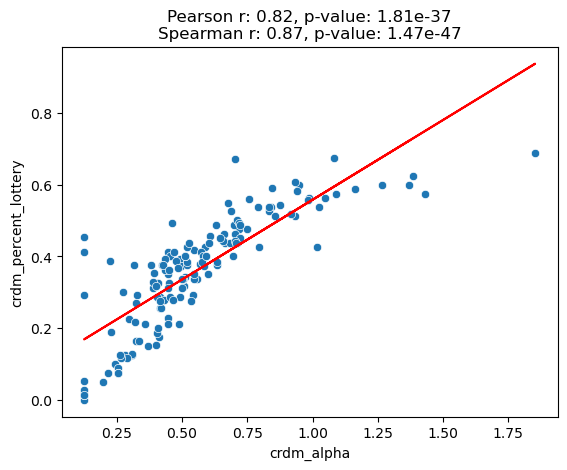

In [33]:
# percent lottery vs alpha

plot_xy(agg_df,xparm='crdm_alpha',yparm='crdm_percent_lottery',fig_nb=1)



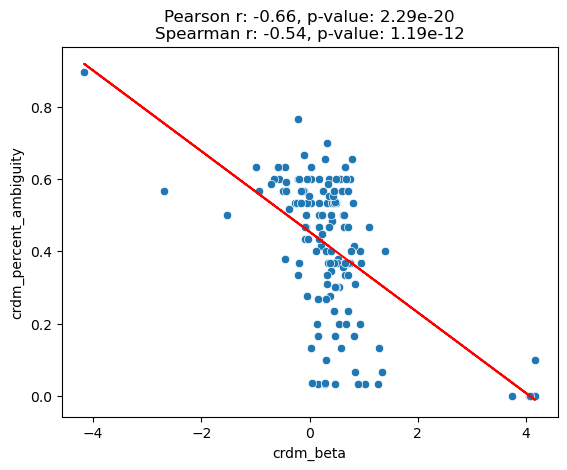

In [34]:
# percent ambiguous vs beta


plot_xy(agg_df,xparm='crdm_beta',yparm='crdm_percent_ambiguity',fig_nb=2)


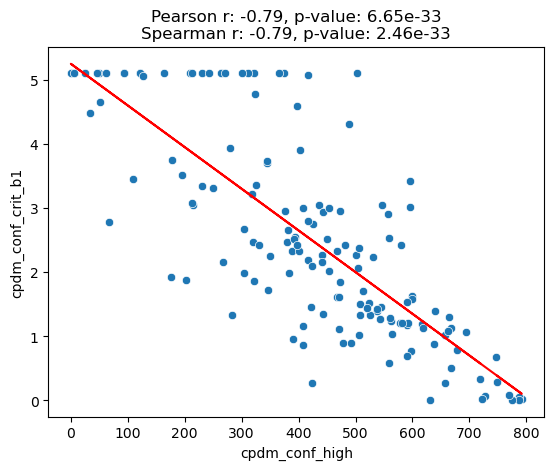

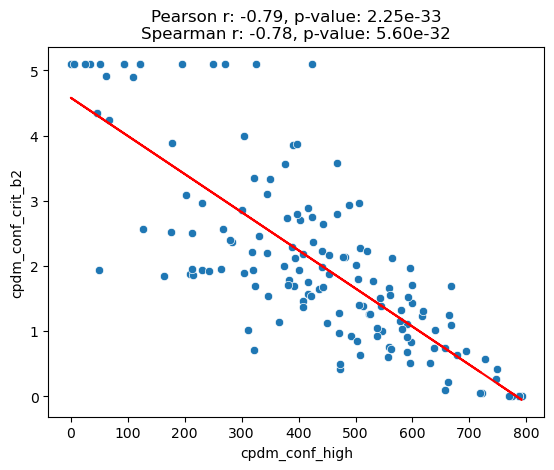

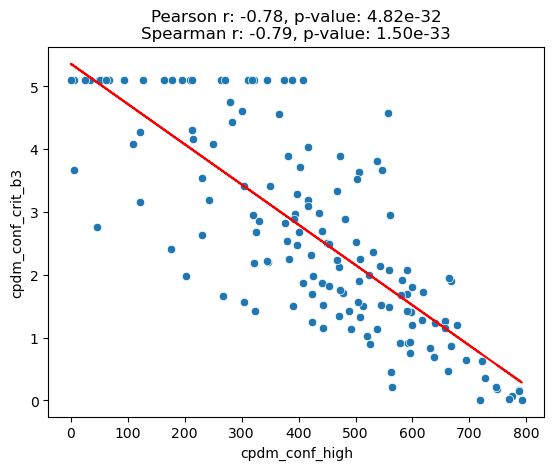

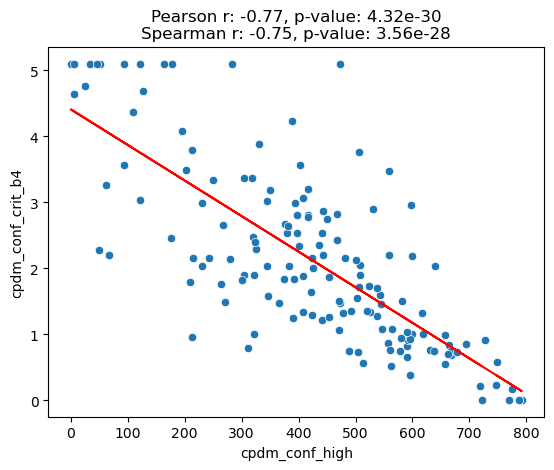

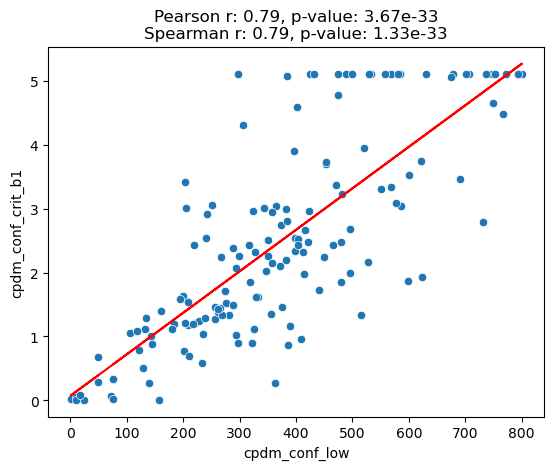

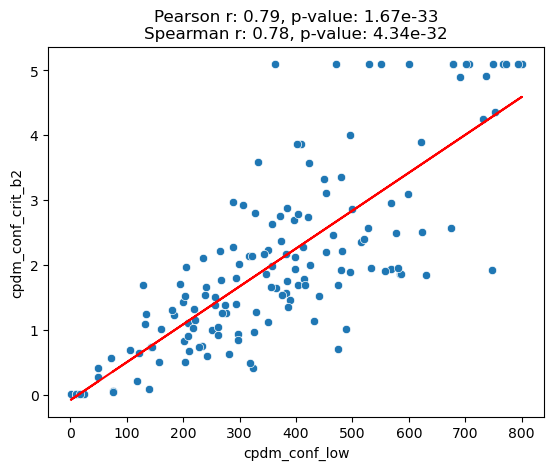

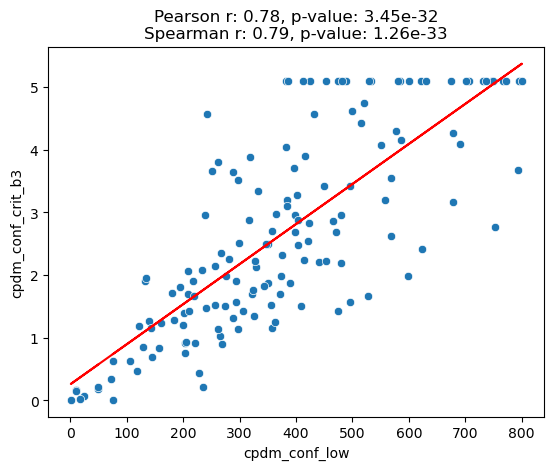

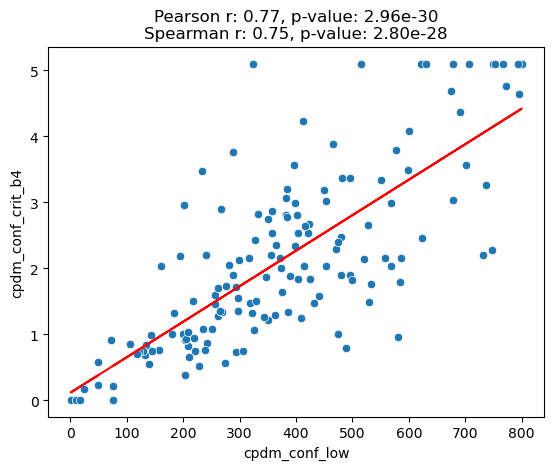

In [35]:
# confidence criteria vs high-low confidence

plot_xy(agg_df,xparm='cpdm_conf_high',yparm='cpdm_conf_crit_b1',fig_nb=101)
plot_xy(agg_df,xparm='cpdm_conf_high',yparm='cpdm_conf_crit_b2',fig_nb=102)
plot_xy(agg_df,xparm='cpdm_conf_high',yparm='cpdm_conf_crit_b3',fig_nb=103)
plot_xy(agg_df,xparm='cpdm_conf_high',yparm='cpdm_conf_crit_b4',fig_nb=104)

plot_xy(agg_df,xparm='cpdm_conf_low',yparm='cpdm_conf_crit_b1',fig_nb=105)
plot_xy(agg_df,xparm='cpdm_conf_low',yparm='cpdm_conf_crit_b2',fig_nb=106)
plot_xy(agg_df,xparm='cpdm_conf_low',yparm='cpdm_conf_crit_b3',fig_nb=107)
plot_xy(agg_df,xparm='cpdm_conf_low',yparm='cpdm_conf_crit_b4',fig_nb=108)
